In [1]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

In [2]:
# opening the file
for expression in os.listdir("D:\\Brain tumor\\input\\train\\"):
     print(str(len(os.listdir("D:\\Brain tumor\\input\\train\\"+expression)))+" "+expression+ 'images')

1426 gliomaimages
708 meningiomaimages
98 Normalimages
930 pituitary tumorimages


In [3]:
#defining train and test data to train the model
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("D:\\Brain tumor\\input\\train\\",target_size=(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("D:\\Brain tumor\\input\\test\\",target_size=(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 3162 images belonging to 4 classes.
Found 1577 images belonging to 4 classes.


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
picture_size=128
folder_path = "D:\\Brain tumor\\input\\"

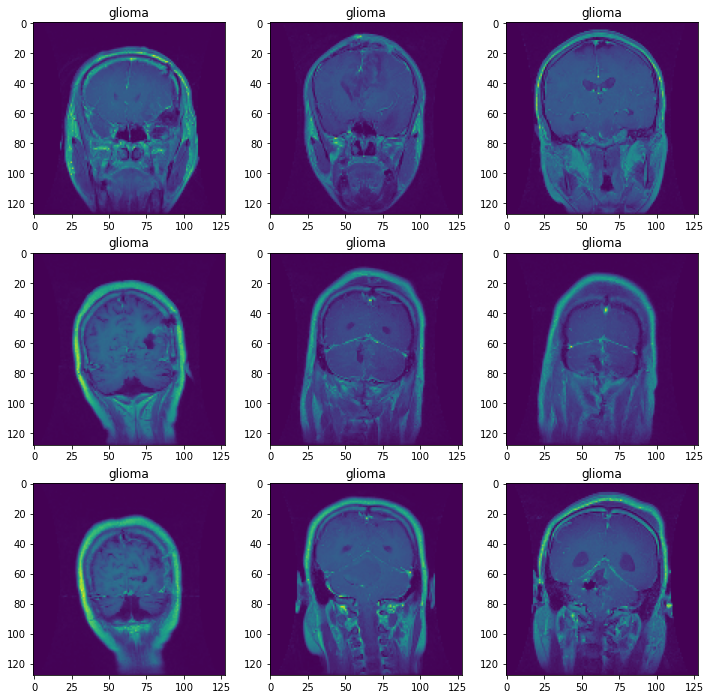

In [6]:
expression = 'glioma'
plt.figure(figsize=(12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img= load_img(folder_path+"train\\"+expression+"/"+os.listdir(folder_path +"train\\" + expression)[i], target_size=(picture_size, picture_size))
    plt.title('glioma')
    plt.imshow(img)
plt.show()

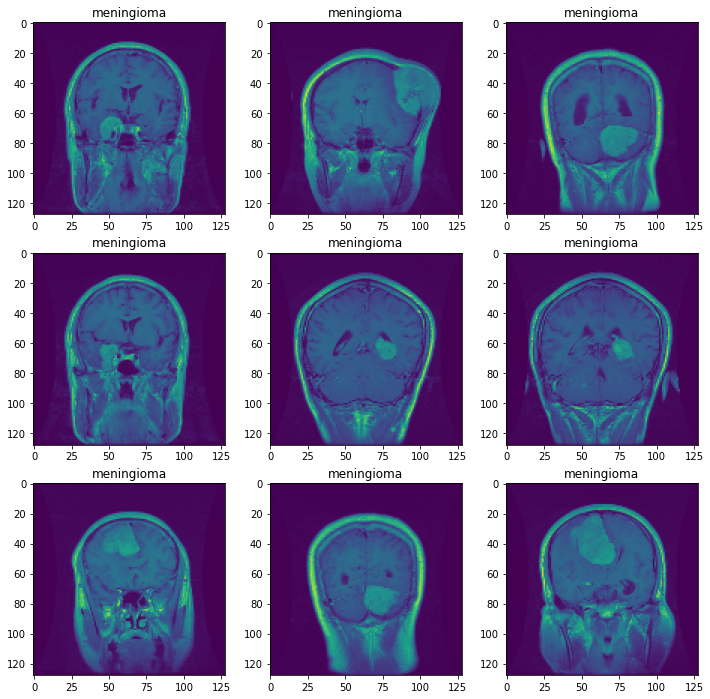

In [7]:
expression = 'meningioma'
plt.figure(figsize=(12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img= load_img(folder_path+"train/"+expression+"/"+os.listdir(folder_path +"train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.title('meningioma')
    plt.imshow(img)
plt.show()

In [8]:
#initialising CNN
model=Sequential()
#conv-1
model.add(Conv2D(64,(3,3), padding='same' , activation="relu", input_shape= (48,48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#conv-4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))
opt=Adam(lr=0.0005)

C:\Users\lenovo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
#compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [10]:
epochs=22
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("mod_weights.h5", monitor="val_accuracy", save_weight_only=True, model='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor= 'val_loss', factor=0.1, patience=2, min_lr= 0.0001, model= 'auto')

history= model.fit(x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=validation_steps)

Epoch 1/22
49/49 [==============================] - 352s 7s/step - loss: 0.7871 - accuracy: 0.6769 - val_loss: 7.2023 - val_accuracy: 0.1654
Epoch 2/22
49/49 [==============================] - 193s 4s/step - loss: 0.5390 - accuracy: 0.7705 - val_loss: 0.8605 - val_accuracy: 0.6217
Epoch 3/22
49/49 [==============================] - 139s 3s/step - loss: 0.4784 - accuracy: 0.7960 - val_loss: 0.5823 - val_accuracy: 0.7663
Epoch 4/22
49/49 [==============================] - 110s 2s/step - loss: 0.4064 - accuracy: 0.8276 - val_loss: 0.6005 - val_accuracy: 0.7852
Epoch 5/22
49/49 [==============================] - 112s 2s/step - loss: 0.3537 - accuracy: 0.8565 - val_loss: 0.4999 - val_accuracy: 0.7852
Epoch 6/22
49/49 [==============================] - 112s 2s/step - loss: 0.3123 - accuracy: 0.8709 - val_loss: 1.4091 - val_accuracy: 0.6595
Epoch 7/22
49/49 [==============================] - 185s 4s/step - loss: 0.2854 - accuracy: 0.8873 - val_loss: 0.4054 - val_accuracy: 0.8301
Epoch 8/22
49

In [34]:
#saving model
model.save('brain_tumor.h5')

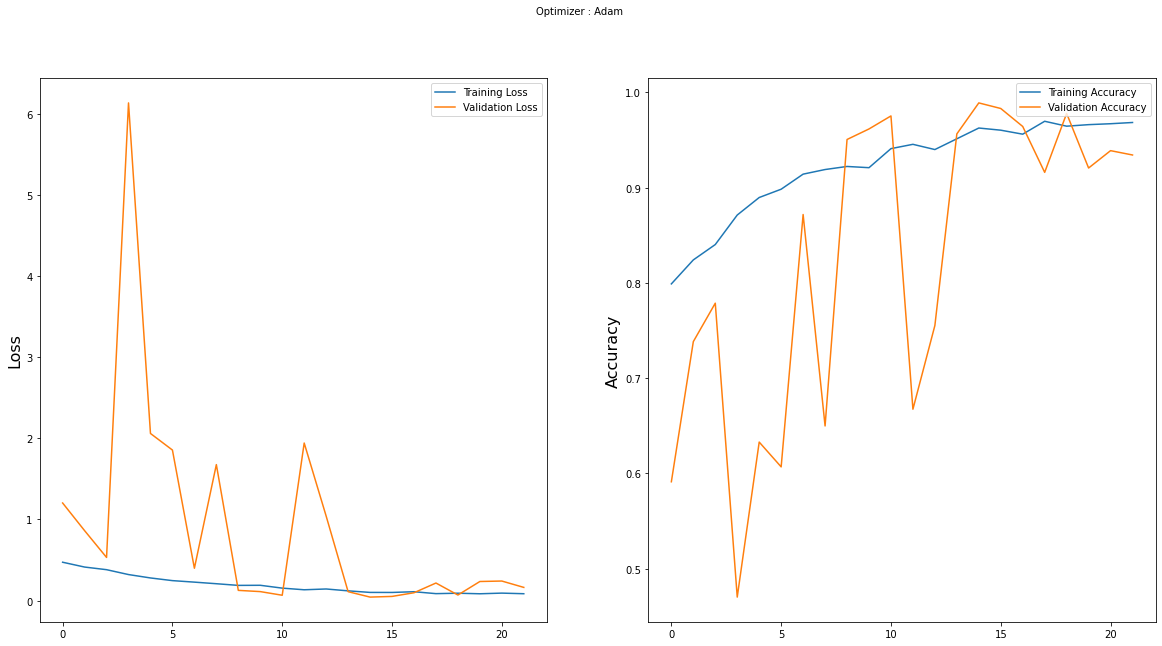

In [36]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')
plt.show()

In [37]:
from tensorflow.keras.models import load_model
classifier = load_model('brain_tumor.h5')

1/1 [==============================] - 0s 51ms/step
'no_tumor'


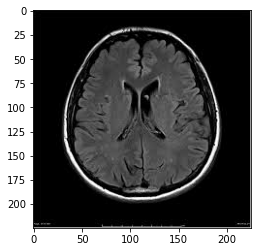

In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image
path = "D:\\Brain tumor\\input\\train\\Normal\\5 no.jpg"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
print("'no_tumor'")
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
    name.append(i)
for i in range(len(s)):
    if (i==a):
         p=name[i]